### Import

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import glob
import time
import os
import pickle
import matplotlib.pyplot as plt
from keras.applications.xception import Xception, preprocess_input
import face_recognition
from PIL import Image, ImageDraw

Using TensorFlow backend.


### Data Read & Checking

In [2]:
train_sample_metadata = pd.read_json('./deepfake-detection-challenge/train_sample_videos/metadata.json').T
train_sample_metadata

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4
...,...,...,...
etejaapnxh.mp4,FAKE,train,wtreibcmgm.mp4
etmcruaihe.mp4,FAKE,train,afoovlsmtx.mp4
etohcvnzbj.mp4,FAKE,train,bdnaqemxmr.mp4
eudeqjhdfd.mp4,REAL,train,None


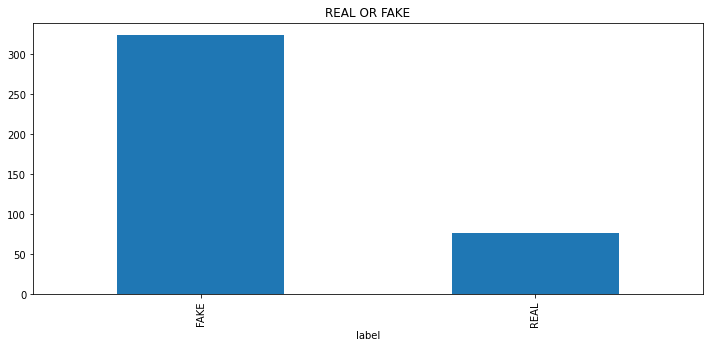

In [5]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(12,5),
                                                            kind='bar',
                                                            title='REAL OR FAKE')
plt.show()

In [6]:
train_sample = ('./deepfake-detection-challenge/train_sample_videos/')
train_video_files = [train_sample + x for x in sorted(os.listdir(train_sample))[:-1]]
train_video_files

['./deepfake-detection-challenge/train_sample_videos/aagfhgtpmv.mp4',
 './deepfake-detection-challenge/train_sample_videos/aapnvogymq.mp4',
 './deepfake-detection-challenge/train_sample_videos/abarnvbtwb.mp4',
 './deepfake-detection-challenge/train_sample_videos/abofeumbvv.mp4',
 './deepfake-detection-challenge/train_sample_videos/abqwwspghj.mp4',
 './deepfake-detection-challenge/train_sample_videos/acifjvzvpm.mp4',
 './deepfake-detection-challenge/train_sample_videos/acqfdwsrhi.mp4',
 './deepfake-detection-challenge/train_sample_videos/acxnxvbsxk.mp4',
 './deepfake-detection-challenge/train_sample_videos/acxwigylke.mp4',
 './deepfake-detection-challenge/train_sample_videos/aczrgyricp.mp4',
 './deepfake-detection-challenge/train_sample_videos/adhsbajydo.mp4',
 './deepfake-detection-challenge/train_sample_videos/adohikbdaz.mp4',
 './deepfake-detection-challenge/train_sample_videos/adylbeequz.mp4',
 './deepfake-detection-challenge/train_sample_videos/aelfnikyqj.mp4',
 './deepfake-detecti

In [7]:
file_name = train_video_files[0].split('/')[-1]
file_name

'aagfhgtpmv.mp4'

In [8]:
def chimac(x):
    count = 0
    frame = 0
    file_name_mp4 = x.split('/')[-1]
    file_name = file_name_mp4.split('.')[0]
    label = train_sample_metadata.loc[file_name_mp4][0]
    origin = train_sample_metadata.loc[file_name_mp4][2]
    if not origin:
        origin = 'NONE'
    else:
        origin = origin.split('.')[0]
    cap = cv.VideoCapture(x)
    while(cap.isOpened()):
        ret = cap.grab()
        if ret == False:
            break
        if frame % 30 == 0:
            ret, image = cap.retrieve()
            landmarks = face_recognition.face_landmarks(image)
            pil = Image.fromarray(image)
            p = ImageDraw.Draw(pil)
            for idx, landmark in enumerate(landmarks):
                for mark in landmark.keys():
                    p.line(landmark[mark], width=3)
            #opencv 사진 합치기
            save_name = f'{file_name}_{label}_{origin}_{count}.jpg'
            pil.save(f'./image/{save_name}')
            print(save_name)
            count += 1
        frame += 1
    cap.release()

In [9]:
for video_file in train_video_files:
    chimac(video_file)

aagfhgtpmv_FAKE_vudstovrck_0.jpg
aagfhgtpmv_FAKE_vudstovrck_1.jpg
aagfhgtpmv_FAKE_vudstovrck_2.jpg
aagfhgtpmv_FAKE_vudstovrck_3.jpg
aagfhgtpmv_FAKE_vudstovrck_4.jpg
aagfhgtpmv_FAKE_vudstovrck_5.jpg
aagfhgtpmv_FAKE_vudstovrck_6.jpg
aagfhgtpmv_FAKE_vudstovrck_7.jpg
aagfhgtpmv_FAKE_vudstovrck_8.jpg
aagfhgtpmv_FAKE_vudstovrck_9.jpg
aapnvogymq_FAKE_jdubbvfswz_0.jpg
aapnvogymq_FAKE_jdubbvfswz_1.jpg
aapnvogymq_FAKE_jdubbvfswz_2.jpg
aapnvogymq_FAKE_jdubbvfswz_3.jpg
aapnvogymq_FAKE_jdubbvfswz_4.jpg
aapnvogymq_FAKE_jdubbvfswz_5.jpg
aapnvogymq_FAKE_jdubbvfswz_6.jpg
aapnvogymq_FAKE_jdubbvfswz_7.jpg
aapnvogymq_FAKE_jdubbvfswz_8.jpg
aapnvogymq_FAKE_jdubbvfswz_9.jpg
abarnvbtwb_REAL_NONE_0.jpg
abarnvbtwb_REAL_NONE_1.jpg
abarnvbtwb_REAL_NONE_2.jpg
abarnvbtwb_REAL_NONE_3.jpg
abarnvbtwb_REAL_NONE_4.jpg
abarnvbtwb_REAL_NONE_5.jpg
abarnvbtwb_REAL_NONE_6.jpg
abarnvbtwb_REAL_NONE_7.jpg
abarnvbtwb_REAL_NONE_8.jpg
abarnvbtwb_REAL_NONE_9.jpg
abofeumbvv_FAKE_atvmxvwyns_0.jpg
abofeumbvv_FAKE_atvmxvwyns_1.jpg
abof

aipfdnwpoo_FAKE_ygdgwyqyut_8.jpg
aipfdnwpoo_FAKE_ygdgwyqyut_9.jpg
ajqslcypsw_REAL_NONE_0.jpg
ajqslcypsw_REAL_NONE_1.jpg
ajqslcypsw_REAL_NONE_2.jpg
ajqslcypsw_REAL_NONE_3.jpg
ajqslcypsw_REAL_NONE_4.jpg
ajqslcypsw_REAL_NONE_5.jpg
ajqslcypsw_REAL_NONE_6.jpg
ajqslcypsw_REAL_NONE_7.jpg
ajqslcypsw_REAL_NONE_8.jpg
ajqslcypsw_REAL_NONE_9.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_0.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_1.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_2.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_3.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_4.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_5.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_6.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_7.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_8.jpg
ajwpjhrbcv_FAKE_bzythlfnhq_9.jpg
aklqzsddfl_FAKE_lyvlnqduqg_0.jpg
aklqzsddfl_FAKE_lyvlnqduqg_1.jpg
aklqzsddfl_FAKE_lyvlnqduqg_2.jpg
aklqzsddfl_FAKE_lyvlnqduqg_3.jpg
aklqzsddfl_FAKE_lyvlnqduqg_4.jpg
aklqzsddfl_FAKE_lyvlnqduqg_5.jpg
aklqzsddfl_FAKE_lyvlnqduqg_6.jpg
aklqzsddfl_FAKE_lyvlnqduqg_7.jpg
aklqzsddfl_FAKE_lyvlnqduqg_8.jpg
aklqzsddfl_FAKE_lyvlnqduqg_9.jpg
aknb

arrhsnjqku_FAKE_inkqxytzyu_0.jpg
arrhsnjqku_FAKE_inkqxytzyu_1.jpg
arrhsnjqku_FAKE_inkqxytzyu_2.jpg
arrhsnjqku_FAKE_inkqxytzyu_3.jpg
arrhsnjqku_FAKE_inkqxytzyu_4.jpg
arrhsnjqku_FAKE_inkqxytzyu_5.jpg
arrhsnjqku_FAKE_inkqxytzyu_6.jpg
arrhsnjqku_FAKE_inkqxytzyu_7.jpg
arrhsnjqku_FAKE_inkqxytzyu_8.jpg
arrhsnjqku_FAKE_inkqxytzyu_9.jpg
asaxgevnnp_REAL_NONE_0.jpg
asaxgevnnp_REAL_NONE_1.jpg
asaxgevnnp_REAL_NONE_2.jpg
asaxgevnnp_REAL_NONE_3.jpg
asaxgevnnp_REAL_NONE_4.jpg
asaxgevnnp_REAL_NONE_5.jpg
asaxgevnnp_REAL_NONE_6.jpg
asaxgevnnp_REAL_NONE_7.jpg
asaxgevnnp_REAL_NONE_8.jpg
asaxgevnnp_REAL_NONE_9.jpg
asdpeebotb_FAKE_znjupdqnwo_0.jpg
asdpeebotb_FAKE_znjupdqnwo_1.jpg
asdpeebotb_FAKE_znjupdqnwo_2.jpg
asdpeebotb_FAKE_znjupdqnwo_3.jpg
asdpeebotb_FAKE_znjupdqnwo_4.jpg
asdpeebotb_FAKE_znjupdqnwo_5.jpg
asdpeebotb_FAKE_znjupdqnwo_6.jpg
asdpeebotb_FAKE_znjupdqnwo_7.jpg
asdpeebotb_FAKE_znjupdqnwo_8.jpg
asdpeebotb_FAKE_znjupdqnwo_9.jpg
aslsvlvpth_FAKE_jepguaulgf_0.jpg
aslsvlvpth_FAKE_jepguaulgf_1.jpg
asls

axczxisdtb_FAKE_meawmsgiti_6.jpg
axczxisdtb_FAKE_meawmsgiti_7.jpg
axczxisdtb_FAKE_meawmsgiti_8.jpg
axczxisdtb_FAKE_meawmsgiti_9.jpg
axntxmycwd_REAL_NONE_0.jpg
axntxmycwd_REAL_NONE_1.jpg
axntxmycwd_REAL_NONE_2.jpg
axntxmycwd_REAL_NONE_3.jpg
axntxmycwd_REAL_NONE_4.jpg
axntxmycwd_REAL_NONE_5.jpg
axntxmycwd_REAL_NONE_6.jpg
axntxmycwd_REAL_NONE_7.jpg
axntxmycwd_REAL_NONE_8.jpg
axntxmycwd_REAL_NONE_9.jpg
axoygtekut_FAKE_topyiohccg_0.jpg
axoygtekut_FAKE_topyiohccg_1.jpg
axoygtekut_FAKE_topyiohccg_2.jpg
axoygtekut_FAKE_topyiohccg_3.jpg
axoygtekut_FAKE_topyiohccg_4.jpg
axoygtekut_FAKE_topyiohccg_5.jpg
axoygtekut_FAKE_topyiohccg_6.jpg
axoygtekut_FAKE_topyiohccg_7.jpg
axoygtekut_FAKE_topyiohccg_8.jpg
axoygtekut_FAKE_topyiohccg_9.jpg
axwgcsyphv_FAKE_mfnowqfdwl_0.jpg
axwgcsyphv_FAKE_mfnowqfdwl_1.jpg
axwgcsyphv_FAKE_mfnowqfdwl_2.jpg
axwgcsyphv_FAKE_mfnowqfdwl_3.jpg
axwgcsyphv_FAKE_mfnowqfdwl_4.jpg
axwgcsyphv_FAKE_mfnowqfdwl_5.jpg
axwgcsyphv_FAKE_mfnowqfdwl_6.jpg
axwgcsyphv_FAKE_mfnowqfdwl_7.jpg
axwg

bgaogsjehq_FAKE_xzvrgckqkz_3.jpg
bgaogsjehq_FAKE_xzvrgckqkz_4.jpg
bgaogsjehq_FAKE_xzvrgckqkz_5.jpg
bgaogsjehq_FAKE_xzvrgckqkz_6.jpg
bgaogsjehq_FAKE_xzvrgckqkz_7.jpg
bgaogsjehq_FAKE_xzvrgckqkz_8.jpg
bgaogsjehq_FAKE_xzvrgckqkz_9.jpg
bggsurpgpr_FAKE_gxembgiarp_0.jpg
bggsurpgpr_FAKE_gxembgiarp_1.jpg
bggsurpgpr_FAKE_gxembgiarp_2.jpg
bggsurpgpr_FAKE_gxembgiarp_3.jpg
bggsurpgpr_FAKE_gxembgiarp_4.jpg
bggsurpgpr_FAKE_gxembgiarp_5.jpg
bggsurpgpr_FAKE_gxembgiarp_6.jpg
bggsurpgpr_FAKE_gxembgiarp_7.jpg
bggsurpgpr_FAKE_gxembgiarp_8.jpg
bggsurpgpr_FAKE_gxembgiarp_9.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_0.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_1.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_2.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_3.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_4.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_5.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_6.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_7.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_8.jpg
bghphrsfxf_FAKE_sgjnvxvcpu_9.jpg
bgmlwsoamc_FAKE_woshnzbxmc_0.jpg
bgmlwsoamc_FAKE_woshnzbxmc_1.jpg
bgmlwsoamc_FAKE_woshnzbxmc_2.jpg
bgmlwsoamc

bmjzrlszhi_REAL_NONE_9.jpg
bnbuonyoje_FAKE_fntskqfxxf_0.jpg
bnbuonyoje_FAKE_fntskqfxxf_1.jpg
bnbuonyoje_FAKE_fntskqfxxf_2.jpg
bnbuonyoje_FAKE_fntskqfxxf_3.jpg
bnbuonyoje_FAKE_fntskqfxxf_4.jpg
bnbuonyoje_FAKE_fntskqfxxf_5.jpg
bnbuonyoje_FAKE_fntskqfxxf_6.jpg
bnbuonyoje_FAKE_fntskqfxxf_7.jpg
bnbuonyoje_FAKE_fntskqfxxf_8.jpg
bnbuonyoje_FAKE_fntskqfxxf_9.jpg
bndybcqhfr_FAKE_xnfwdpptym_0.jpg
bndybcqhfr_FAKE_xnfwdpptym_1.jpg
bndybcqhfr_FAKE_xnfwdpptym_2.jpg
bndybcqhfr_FAKE_xnfwdpptym_3.jpg
bndybcqhfr_FAKE_xnfwdpptym_4.jpg
bndybcqhfr_FAKE_xnfwdpptym_5.jpg
bndybcqhfr_FAKE_xnfwdpptym_6.jpg
bndybcqhfr_FAKE_xnfwdpptym_7.jpg
bndybcqhfr_FAKE_xnfwdpptym_8.jpg
bndybcqhfr_FAKE_xnfwdpptym_9.jpg
bnjcdrfuov_FAKE_ellavthztb_0.jpg
bnjcdrfuov_FAKE_ellavthztb_1.jpg
bnjcdrfuov_FAKE_ellavthztb_2.jpg
bnjcdrfuov_FAKE_ellavthztb_3.jpg
bnjcdrfuov_FAKE_ellavthztb_4.jpg
bnjcdrfuov_FAKE_ellavthztb_5.jpg
bnjcdrfuov_FAKE_ellavthztb_6.jpg
bnjcdrfuov_FAKE_ellavthztb_7.jpg
bnjcdrfuov_FAKE_ellavthztb_8.jpg
bnjcdrfuov_FAKE_

btjlfpzbdu_FAKE_drcyabprvt_2.jpg
btjlfpzbdu_FAKE_drcyabprvt_3.jpg
btjlfpzbdu_FAKE_drcyabprvt_4.jpg
btjlfpzbdu_FAKE_drcyabprvt_5.jpg
btjlfpzbdu_FAKE_drcyabprvt_6.jpg
btjlfpzbdu_FAKE_drcyabprvt_7.jpg
btjlfpzbdu_FAKE_drcyabprvt_8.jpg
btjlfpzbdu_FAKE_drcyabprvt_9.jpg
btjwbtsgln_FAKE_xwcggrygwl_0.jpg
btjwbtsgln_FAKE_xwcggrygwl_1.jpg
btjwbtsgln_FAKE_xwcggrygwl_2.jpg
btjwbtsgln_FAKE_xwcggrygwl_3.jpg
btjwbtsgln_FAKE_xwcggrygwl_4.jpg
btjwbtsgln_FAKE_xwcggrygwl_5.jpg
btjwbtsgln_FAKE_xwcggrygwl_6.jpg
btjwbtsgln_FAKE_xwcggrygwl_7.jpg
btjwbtsgln_FAKE_xwcggrygwl_8.jpg
btjwbtsgln_FAKE_xwcggrygwl_9.jpg
btmsngnqhv_FAKE_crezycjqyk_0.jpg
btmsngnqhv_FAKE_crezycjqyk_1.jpg
btmsngnqhv_FAKE_crezycjqyk_2.jpg
btmsngnqhv_FAKE_crezycjqyk_3.jpg
btmsngnqhv_FAKE_crezycjqyk_4.jpg
btmsngnqhv_FAKE_crezycjqyk_5.jpg
btmsngnqhv_FAKE_crezycjqyk_6.jpg
btmsngnqhv_FAKE_crezycjqyk_7.jpg
btmsngnqhv_FAKE_crezycjqyk_8.jpg
btmsngnqhv_FAKE_crezycjqyk_9.jpg
btohlidmru_FAKE_cyxlcuyznd_0.jpg
btohlidmru_FAKE_cyxlcuyznd_1.jpg
btohlidmru

cbbibzcoih_FAKE_lietldeotq_2.jpg
cbbibzcoih_FAKE_lietldeotq_3.jpg
cbbibzcoih_FAKE_lietldeotq_4.jpg
cbbibzcoih_FAKE_lietldeotq_5.jpg
cbbibzcoih_FAKE_lietldeotq_6.jpg
cbbibzcoih_FAKE_lietldeotq_7.jpg
cbbibzcoih_FAKE_lietldeotq_8.jpg
cbbibzcoih_FAKE_lietldeotq_9.jpg
cbltdtxglo_FAKE_svcnlasmeh_0.jpg
cbltdtxglo_FAKE_svcnlasmeh_1.jpg
cbltdtxglo_FAKE_svcnlasmeh_2.jpg
cbltdtxglo_FAKE_svcnlasmeh_3.jpg
cbltdtxglo_FAKE_svcnlasmeh_4.jpg
cbltdtxglo_FAKE_svcnlasmeh_5.jpg
cbltdtxglo_FAKE_svcnlasmeh_6.jpg
cbltdtxglo_FAKE_svcnlasmeh_7.jpg
cbltdtxglo_FAKE_svcnlasmeh_8.jpg
cbltdtxglo_FAKE_svcnlasmeh_9.jpg
ccfoszqabv_REAL_NONE_0.jpg
ccfoszqabv_REAL_NONE_1.jpg
ccfoszqabv_REAL_NONE_2.jpg
ccfoszqabv_REAL_NONE_3.jpg
ccfoszqabv_REAL_NONE_4.jpg
ccfoszqabv_REAL_NONE_5.jpg
ccfoszqabv_REAL_NONE_6.jpg
ccfoszqabv_REAL_NONE_7.jpg
ccfoszqabv_REAL_NONE_8.jpg
ccfoszqabv_REAL_NONE_9.jpg
ccmonzqfrz_FAKE_gxhcuxulhi_0.jpg
ccmonzqfrz_FAKE_gxhcuxulhi_1.jpg
ccmonzqfrz_FAKE_gxhcuxulhi_2.jpg
ccmonzqfrz_FAKE_gxhcuxulhi_3.jpg
ccmo

cksanfsjhc_FAKE_atkdltyyen_5.jpg
cksanfsjhc_FAKE_atkdltyyen_6.jpg
cksanfsjhc_FAKE_atkdltyyen_7.jpg
cksanfsjhc_FAKE_atkdltyyen_8.jpg
cksanfsjhc_FAKE_atkdltyyen_9.jpg
clihsshdkq_FAKE_qzimuostzz_0.jpg
clihsshdkq_FAKE_qzimuostzz_1.jpg
clihsshdkq_FAKE_qzimuostzz_2.jpg
clihsshdkq_FAKE_qzimuostzz_3.jpg
clihsshdkq_FAKE_qzimuostzz_4.jpg
clihsshdkq_FAKE_qzimuostzz_5.jpg
clihsshdkq_FAKE_qzimuostzz_6.jpg
clihsshdkq_FAKE_qzimuostzz_7.jpg
clihsshdkq_FAKE_qzimuostzz_8.jpg
clihsshdkq_FAKE_qzimuostzz_9.jpg
clrycekyst_REAL_NONE_0.jpg
clrycekyst_REAL_NONE_1.jpg
clrycekyst_REAL_NONE_2.jpg
clrycekyst_REAL_NONE_3.jpg
clrycekyst_REAL_NONE_4.jpg
clrycekyst_REAL_NONE_5.jpg
clrycekyst_REAL_NONE_6.jpg
clrycekyst_REAL_NONE_7.jpg
clrycekyst_REAL_NONE_8.jpg
clrycekyst_REAL_NONE_9.jpg
cmbzllswnl_REAL_NONE_0.jpg
cmbzllswnl_REAL_NONE_1.jpg
cmbzllswnl_REAL_NONE_2.jpg
cmbzllswnl_REAL_NONE_3.jpg
cmbzllswnl_REAL_NONE_4.jpg
cmbzllswnl_REAL_NONE_5.jpg
cmbzllswnl_REAL_NONE_6.jpg
cmbzllswnl_REAL_NONE_7.jpg
cmbzllswnl_REAL_NON

cwqlvzefpg_FAKE_qeumxirsme_6.jpg
cwqlvzefpg_FAKE_qeumxirsme_7.jpg
cwqlvzefpg_FAKE_qeumxirsme_8.jpg
cwqlvzefpg_FAKE_qeumxirsme_9.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_0.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_1.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_2.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_3.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_4.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_5.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_6.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_7.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_8.jpg
cwrtyzndpx_FAKE_kgbkktcjxf_9.jpg
cwsbspfzck_FAKE_wtreibcmgm_0.jpg
cwsbspfzck_FAKE_wtreibcmgm_1.jpg
cwsbspfzck_FAKE_wtreibcmgm_2.jpg
cwsbspfzck_FAKE_wtreibcmgm_3.jpg
cwsbspfzck_FAKE_wtreibcmgm_4.jpg
cwsbspfzck_FAKE_wtreibcmgm_5.jpg
cwsbspfzck_FAKE_wtreibcmgm_6.jpg
cwsbspfzck_FAKE_wtreibcmgm_7.jpg
cwsbspfzck_FAKE_wtreibcmgm_8.jpg
cwsbspfzck_FAKE_wtreibcmgm_9.jpg
cwwandrkus_FAKE_kgbkktcjxf_0.jpg
cwwandrkus_FAKE_kgbkktcjxf_1.jpg
cwwandrkus_FAKE_kgbkktcjxf_2.jpg
cwwandrkus_FAKE_kgbkktcjxf_3.jpg
cwwandrkus_FAKE_kgbkktcjxf_4.jpg
cwwandrkus_FAKE_kgbkktcjxf_5.jpg
cwwandrkus

ddepeddixj_REAL_NONE_2.jpg
ddepeddixj_REAL_NONE_3.jpg
ddepeddixj_REAL_NONE_4.jpg
ddepeddixj_REAL_NONE_5.jpg
ddepeddixj_REAL_NONE_6.jpg
ddepeddixj_REAL_NONE_7.jpg
ddepeddixj_REAL_NONE_8.jpg
ddepeddixj_REAL_NONE_9.jpg
ddhfabwpuz_FAKE_luvasmspox_0.jpg
ddhfabwpuz_FAKE_luvasmspox_1.jpg
ddhfabwpuz_FAKE_luvasmspox_2.jpg
ddhfabwpuz_FAKE_luvasmspox_3.jpg
ddhfabwpuz_FAKE_luvasmspox_4.jpg
ddhfabwpuz_FAKE_luvasmspox_5.jpg
ddhfabwpuz_FAKE_luvasmspox_6.jpg
ddhfabwpuz_FAKE_luvasmspox_7.jpg
ddhfabwpuz_FAKE_luvasmspox_8.jpg
ddhfabwpuz_FAKE_luvasmspox_9.jpg
ddjggcasdw_FAKE_qtnjyomzwo_0.jpg
ddjggcasdw_FAKE_qtnjyomzwo_1.jpg
ddjggcasdw_FAKE_qtnjyomzwo_2.jpg
ddjggcasdw_FAKE_qtnjyomzwo_3.jpg
ddjggcasdw_FAKE_qtnjyomzwo_4.jpg
ddjggcasdw_FAKE_qtnjyomzwo_5.jpg
ddjggcasdw_FAKE_qtnjyomzwo_6.jpg
ddjggcasdw_FAKE_qtnjyomzwo_7.jpg
ddjggcasdw_FAKE_qtnjyomzwo_8.jpg
ddjggcasdw_FAKE_qtnjyomzwo_9.jpg
ddpvuimigj_FAKE_ijokcwewbs_0.jpg
ddpvuimigj_FAKE_ijokcwewbs_1.jpg
ddpvuimigj_FAKE_ijokcwewbs_2.jpg
ddpvuimigj_FAKE_ijokcwewb

djxdyjopjd_REAL_NONE_7.jpg
djxdyjopjd_REAL_NONE_8.jpg
djxdyjopjd_REAL_NONE_9.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_0.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_1.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_2.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_3.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_4.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_5.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_6.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_7.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_8.jpg
dkdwxmtpuo_FAKE_mmhqllmlew_9.jpg
dkhlttuvmx_FAKE_qeumxirsme_0.jpg
dkhlttuvmx_FAKE_qeumxirsme_1.jpg
dkhlttuvmx_FAKE_qeumxirsme_2.jpg
dkhlttuvmx_FAKE_qeumxirsme_3.jpg
dkhlttuvmx_FAKE_qeumxirsme_4.jpg
dkhlttuvmx_FAKE_qeumxirsme_5.jpg
dkhlttuvmx_FAKE_qeumxirsme_6.jpg
dkhlttuvmx_FAKE_qeumxirsme_7.jpg
dkhlttuvmx_FAKE_qeumxirsme_8.jpg
dkhlttuvmx_FAKE_qeumxirsme_9.jpg
dkrvorliqc_FAKE_hcswybumab_0.jpg
dkrvorliqc_FAKE_hcswybumab_1.jpg
dkrvorliqc_FAKE_hcswybumab_2.jpg
dkrvorliqc_FAKE_hcswybumab_3.jpg
dkrvorliqc_FAKE_hcswybumab_4.jpg
dkrvorliqc_FAKE_hcswybumab_5.jpg
dkrvorliqc_FAKE_hcswybumab_6.jpg
dkrvorliqc_FAKE_hcswybumab_7

drtbksnpol_FAKE_dzyuwjkjui_4.jpg
drtbksnpol_FAKE_dzyuwjkjui_5.jpg
drtbksnpol_FAKE_dzyuwjkjui_6.jpg
drtbksnpol_FAKE_dzyuwjkjui_7.jpg
drtbksnpol_FAKE_dzyuwjkjui_8.jpg
drtbksnpol_FAKE_dzyuwjkjui_9.jpg
dsdoseflas_FAKE_dzyuwjkjui_0.jpg
dsdoseflas_FAKE_dzyuwjkjui_1.jpg
dsdoseflas_FAKE_dzyuwjkjui_2.jpg
dsdoseflas_FAKE_dzyuwjkjui_3.jpg
dsdoseflas_FAKE_dzyuwjkjui_4.jpg
dsdoseflas_FAKE_dzyuwjkjui_5.jpg
dsdoseflas_FAKE_dzyuwjkjui_6.jpg
dsdoseflas_FAKE_dzyuwjkjui_7.jpg
dsdoseflas_FAKE_dzyuwjkjui_8.jpg
dsdoseflas_FAKE_dzyuwjkjui_9.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_0.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_1.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_2.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_3.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_4.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_5.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_6.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_7.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_8.jpg
dsgpbgsrdm_FAKE_nlerwupaqr_9.jpg
dsjbknkujw_REAL_NONE_0.jpg
dsjbknkujw_REAL_NONE_1.jpg
dsjbknkujw_REAL_NONE_2.jpg
dsjbknkujw_REAL_NONE_3.jpg
dsjbknkujw_REAL_NONE_4.jpg
dsjbknk

ebebgmtlcu_FAKE_iufotyxgzb_0.jpg
ebebgmtlcu_FAKE_iufotyxgzb_1.jpg
ebebgmtlcu_FAKE_iufotyxgzb_2.jpg
ebebgmtlcu_FAKE_iufotyxgzb_3.jpg
ebebgmtlcu_FAKE_iufotyxgzb_4.jpg
ebebgmtlcu_FAKE_iufotyxgzb_5.jpg
ebebgmtlcu_FAKE_iufotyxgzb_6.jpg
ebebgmtlcu_FAKE_iufotyxgzb_7.jpg
ebebgmtlcu_FAKE_iufotyxgzb_8.jpg
ebebgmtlcu_FAKE_iufotyxgzb_9.jpg
ebeknhudxq_FAKE_fysyrqfguw_0.jpg
ebeknhudxq_FAKE_fysyrqfguw_1.jpg
ebeknhudxq_FAKE_fysyrqfguw_2.jpg
ebeknhudxq_FAKE_fysyrqfguw_3.jpg
ebeknhudxq_FAKE_fysyrqfguw_4.jpg
ebeknhudxq_FAKE_fysyrqfguw_5.jpg
ebeknhudxq_FAKE_fysyrqfguw_6.jpg
ebeknhudxq_FAKE_fysyrqfguw_7.jpg
ebeknhudxq_FAKE_fysyrqfguw_8.jpg
ebeknhudxq_FAKE_fysyrqfguw_9.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_0.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_1.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_2.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_3.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_4.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_5.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_6.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_7.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_8.jpg
ebkzwjgjhq_FAKE_kgbkktcjxf_9.jpg
ebywfrmhtd

ehfiekigla_FAKE_avmjormvsx_1.jpg
ehfiekigla_FAKE_avmjormvsx_2.jpg
ehfiekigla_FAKE_avmjormvsx_3.jpg
ehfiekigla_FAKE_avmjormvsx_4.jpg
ehfiekigla_FAKE_avmjormvsx_5.jpg
ehfiekigla_FAKE_avmjormvsx_6.jpg
ehfiekigla_FAKE_avmjormvsx_7.jpg
ehfiekigla_FAKE_avmjormvsx_8.jpg
ehfiekigla_FAKE_avmjormvsx_9.jpg
ehieahnhte_FAKE_sasoxcqisz_0.jpg
ehieahnhte_FAKE_sasoxcqisz_1.jpg
ehieahnhte_FAKE_sasoxcqisz_2.jpg
ehieahnhte_FAKE_sasoxcqisz_3.jpg
ehieahnhte_FAKE_sasoxcqisz_4.jpg
ehieahnhte_FAKE_sasoxcqisz_5.jpg
ehieahnhte_FAKE_sasoxcqisz_6.jpg
ehieahnhte_FAKE_sasoxcqisz_7.jpg
ehieahnhte_FAKE_sasoxcqisz_8.jpg
ehieahnhte_FAKE_sasoxcqisz_9.jpg
ehtdtkmmli_REAL_NONE_0.jpg
ehtdtkmmli_REAL_NONE_1.jpg
ehtdtkmmli_REAL_NONE_2.jpg
ehtdtkmmli_REAL_NONE_3.jpg
ehtdtkmmli_REAL_NONE_4.jpg
ehtdtkmmli_REAL_NONE_5.jpg
ehtdtkmmli_REAL_NONE_6.jpg
ehtdtkmmli_REAL_NONE_7.jpg
ehtdtkmmli_REAL_NONE_8.jpg
ehtdtkmmli_REAL_NONE_9.jpg
eiriyukqqy_FAKE_ixuouyigxa_0.jpg
eiriyukqqy_FAKE_ixuouyigxa_1.jpg
eiriyukqqy_FAKE_ixuouyigxa_2.jpg
eiri

erqgqacbqe_FAKE_nvpluswotp_9.jpg
errocgcham_FAKE_grnycmbdfu_0.jpg
errocgcham_FAKE_grnycmbdfu_1.jpg
errocgcham_FAKE_grnycmbdfu_2.jpg
errocgcham_FAKE_grnycmbdfu_3.jpg
errocgcham_FAKE_grnycmbdfu_4.jpg
errocgcham_FAKE_grnycmbdfu_5.jpg
errocgcham_FAKE_grnycmbdfu_6.jpg
errocgcham_FAKE_grnycmbdfu_7.jpg
errocgcham_FAKE_grnycmbdfu_8.jpg
errocgcham_FAKE_grnycmbdfu_9.jpg
esckbnkkvb_FAKE_gdfyzwykty_0.jpg
esckbnkkvb_FAKE_gdfyzwykty_1.jpg
esckbnkkvb_FAKE_gdfyzwykty_2.jpg
esckbnkkvb_FAKE_gdfyzwykty_3.jpg
esckbnkkvb_FAKE_gdfyzwykty_4.jpg
esckbnkkvb_FAKE_gdfyzwykty_5.jpg
esckbnkkvb_FAKE_gdfyzwykty_6.jpg
esckbnkkvb_FAKE_gdfyzwykty_7.jpg
esckbnkkvb_FAKE_gdfyzwykty_8.jpg
esckbnkkvb_FAKE_gdfyzwykty_9.jpg
esgftaficx_FAKE_rrcsuwgpnd_0.jpg
esgftaficx_FAKE_rrcsuwgpnd_1.jpg
esgftaficx_FAKE_rrcsuwgpnd_2.jpg
esgftaficx_FAKE_rrcsuwgpnd_3.jpg
esgftaficx_FAKE_rrcsuwgpnd_4.jpg
esgftaficx_FAKE_rrcsuwgpnd_5.jpg
esgftaficx_FAKE_rrcsuwgpnd_6.jpg
esgftaficx_FAKE_rrcsuwgpnd_7.jpg
esgftaficx_FAKE_rrcsuwgpnd_8.jpg
esgftaficx

In [ ]:
import shutil

In [39]:
path_image='./image/'
for idx, img_name in enumerate(sorted(os.listdir('./image/'))):
    shutil.copy(path_image + img_name, f"./{img_name.split('_')[1]}/"+img_name)
    print('*',end='')
    if idx % 50 == 49:
        print(idx+1)

*
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
********

In [38]:
path_image + img_name

'./image/FAKE'